All the required tables are stored in databricks file system. Now we are extracting them into dataframes using pyspark.

In [0]:
# File location and type
cus_trans= "/FileStore/tables/customer_transaction_data.csv"
campaign="/FileStore/tables/campaign_data.csv"
coupon_item="/FileStore/tables/coupon_item_mapping.csv"
customer_demographics="/FileStore/tables/customer_demographics.csv"
test_data="/FileStore/tables/test.csv"
train_data="/FileStore/tables/train.csv"
item_data="/FileStore/tables/item_data.csv"
osi_data="/FileStore/tables/online_shoppers_intention.csv"
file_type = "csv"

# CSV options
infer_schema = "true" #Accepting schema/data format from source
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
custrans = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(cus_trans)

camp = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(campaign)

coupitem = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(coupon_item)

cusdemo = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(customer_demographics)

item = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(item_data)

test = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(test_data)

train = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(train_data)

osi = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(osi_data)

# Checking schema for each table
custrans.printSchema()
camp.printSchema()
coupitem.printSchema()
item.printSchema()
cusdemo.printSchema()
test.printSchema()
train.printSchema()
osi.printSchema()

root
 |-- date: date (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- selling_price: double (nullable = true)
 |-- other_discount: double (nullable = true)
 |-- coupon_discount: double (nullable = true)

root
 |-- campaign_id: integer (nullable = true)
 |-- campaign_type: string (nullable = true)
 |-- start_date: date (nullable = true)
 |-- end_date: date (nullable = true)

root
 |-- coupon_id: integer (nullable = true)
 |-- item_id: integer (nullable = true)

root
 |-- item_id: integer (nullable = true)
 |-- brand: integer (nullable = true)
 |-- brand_type: string (nullable = true)
 |-- category: string (nullable = true)

root
 |-- customer_id: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- rented: integer (nullable = true)
 |-- family_size: string (nullable = true)
 |-- no_of_children: string (nullable = true)
 |-- i

In [0]:
custrans.count()
camp.count()
coupitem.count()
item.count()
cusdemo.count()
test.count()
train.count()
osi.count()

Out[2]: 12330

In [0]:
train.show(5,truncate=False)

+---+-----------+---------+-----------+-----------------+
|id |campaign_id|coupon_id|customer_id|redemption_status|
+---+-----------+---------+-----------+-----------------+
|1  |13         |27       |1053       |0                |
|2  |13         |116      |48         |0                |
|6  |9          |635      |205        |0                |
|7  |13         |644      |1050       |0                |
|9  |8          |1017     |1489       |0                |
+---+-----------+---------+-----------+-----------------+
only showing top 5 rows



In [0]:
train.groupby("redemption_status").count().show(truncate=False)

+-----------------+-----+
|redemption_status|count|
+-----------------+-----+
|1                |729  |
|0                |77640|
+-----------------+-----+



Checking for null values in columns of every table

In [0]:
import pyspark
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from pyspark.sql.functions import *
train.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in train.columns]).show(truncate=False,vertical=True)
#df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()


-RECORD 0----------------
 id                | 0   
 campaign_id       | 0   
 coupon_id         | 0   
 customer_id       | 0   
 redemption_status | 0   



In [0]:
from pyspark.sql.functions import *
custrans.select([count(when(col(c).isNull(),c)).alias(c) for c in custrans.columns]).show(truncate=False,vertical=True)

-RECORD 0--------------
 date            | 0   
 customer_id     | 0   
 item_id         | 0   
 quantity        | 0   
 selling_price   | 0   
 other_discount  | 0   
 coupon_discount | 0   



In [0]:
from pyspark.sql.functions import *
camp.select([count(when(col(c).isNull(),c)).alias(c) for c in camp.columns]).show(truncate=False,vertical=True)

-RECORD 0------------
 campaign_id   | 0   
 campaign_type | 0   
 start_date    | 0   
 end_date      | 0   



In [0]:
from pyspark.sql.functions import *
item.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in item.columns]).show(truncate=False,vertical=True)

-RECORD 0---------
 item_id    | 0   
 brand      | 0   
 brand_type | 0   
 category   | 0   



In [0]:
from pyspark.sql.functions import *
coupitem.select([count(when(col(c).isNull(),c)).alias(c) for c in coupitem.columns]).show(truncate=False,vertical=True)

-RECORD 0--------
 coupon_id | 0   
 item_id   | 0   



In [0]:
from pyspark.sql.functions import *
osi.select([count(when(col(c).isNull(),c)).alias(c) for c in osi.columns]).show(truncate=False,vertical=True)

-RECORD 0----------------------
 Administrative          | 0   
 Administrative_Duration | 0   
 Informational           | 0   
 Informational_Duration  | 0   
 ProductRelated          | 0   
 ProductRelated_Duration | 0   
 BounceRates             | 0   
 ExitRates               | 0   
 PageValues              | 0   
 SpecialDay              | 0   
 Month                   | 0   
 OperatingSystems        | 0   
 Browser                 | 0   
 Region                  | 0   
 TrafficType             | 0   
 VisitorType             | 0   
 Weekend                 | 0   
 Revenue                 | 0   



In [0]:
from pyspark.sql.functions import *
cusdemo.select([count(when(col(c).isNull(),c)).alias(c) for c in cusdemo.columns]).show(truncate=False,vertical=True)

-RECORD 0-------------
 customer_id    | 0   
 age_range      | 0   
 marital_status | 329 
 rented         | 0   
 family_size    | 0   
 no_of_children | 538 
 income_bracket | 0   



In [0]:
cusdemo.show(50,truncate=False)

+-----------+---------+--------------+------+-----------+--------------+--------------+
|customer_id|age_range|marital_status|rented|family_size|no_of_children|income_bracket|
+-----------+---------+--------------+------+-----------+--------------+--------------+
|1          |70+      |Married       |0     |2          |null          |4             |
|6          |46-55    |Married       |0     |2          |null          |5             |
|7          |26-35    |null          |0     |3          |1             |3             |
|8          |26-35    |null          |0     |4          |2             |6             |
|10         |46-55    |Single        |0     |1          |null          |5             |
|11         |70+      |Single        |0     |2          |null          |1             |
|12         |46-55    |Married       |0     |2          |null          |7             |
|13         |36-45    |Single        |0     |1          |null          |2             |
|14         |26-35    |Married  

In [0]:
cusdemo.groupby("marital_status").count().show()

+--------------+-----+
|marital_status|count|
+--------------+-----+
|          null|  329|
|       Married|  317|
|        Single|  114|
+--------------+-----+



In [0]:
cusdemo.groupby("family_size").count().show()

+-----------+-----+
|family_size|count|
+-----------+-----+
|          3|  104|
|         5+|   57|
|          1|  248|
|          4|   48|
|          2|  303|
+-----------+-----+



In [0]:
cusdemo.groupby("age_range").count().show()

+---------+-----+
|age_range|count|
+---------+-----+
|    18-25|   45|
|    26-35|  130|
|      70+|   68|
|    46-55|  271|
|    56-70|   59|
|    36-45|  187|
+---------+-----+



In [0]:
cusdemo.groupby("no_of_children").count().show()

+--------------+-----+
|no_of_children|count|
+--------------+-----+
|          null|  538|
|             1|  107|
|            3+|   60|
|             2|   55|
+--------------+-----+



In [0]:
from pyspark.sql.functions import regexp_replace
cusdemo=cusdemo.withColumn("no_of_children",regexp_replace(cusdemo.no_of_children,"[@\+\#\$\%\^\!]+",'').cast("Integer"))

cusdemo.groupby("no_of_children").count().show()

In [0]:
cusdemo=cusdemo.withColumn("family_size",regexp_replace(cusdemo.family_size,"[@\+\#\$\%\^\!]+",'').cast("Integer"))

cusdemo.groupby("family_size").count().show()

+-----------+-----+
|family_size|count|
+-----------+-----+
|          1|  248|
|          3|  104|
|          5|   57|
|          4|   48|
|          2|  303|
+-----------+-----+



Filling null values of marital_status

In [0]:
cusdemo1=cusdemo.withColumn("marital_status",when((cusdemo.marital_status.isNull()) & (cusdemo.family_size==1),'Single').otherwise(cusdemo.marital_status))

In [0]:
cusdemo1.groupby("marital_status").count().show()

+--------------+-----+
|marital_status|count|
+--------------+-----+
|          null|  146|
|       Married|  317|
|        Single|  297|
+--------------+-----+



In [0]:
cusdemo2=cusdemo1.withColumn("marital_status",when((cusdemo1.marital_status.isNull()) & ((cusdemo1.family_size-cusdemo1.no_of_children)==1),'Single').otherwise(cusdemo1.marital_status))

In [0]:
cusdemo2.groupby("marital_status").count().show()

+--------------+-----+
|marital_status|count|
+--------------+-----+
|          null|  133|
|       Married|  317|
|        Single|  310|
+--------------+-----+



In [0]:
cusdemo3=cusdemo2.withColumn("marital_status",when((cusdemo2.marital_status.isNull())&((cusdemo2.family_size-cusdemo2.no_of_children)==2),'Married').otherwise(cusdemo2.marital_status))

In [0]:
cusdemo3.groupby("marital_status").count().show()

+--------------+-----+
|marital_status|count|
+--------------+-----+
|          null|   89|
|       Married|  361|
|        Single|  310|
+--------------+-----+



In [0]:
cusdemo4=cusdemo3.withColumn("marital_status",when((cusdemo3.marital_status.isNull())&(cusdemo3.family_size==2)&(cusdemo3.no_of_children.isNull()),'Married').otherwise(cusdemo3.marital_status))

In [0]:
cusdemo4.groupby("marital_status").count().show()

+--------------+-----+
|marital_status|count|
+--------------+-----+
|       Married|  450|
|        Single|  310|
+--------------+-----+



In [0]:
cusdemo4.where(cusdemo4.family_size==2).groupby("marital_status").count().show()

+--------------+-----+
|marital_status|count|
+--------------+-----+
|       Married|  264|
|        Single|   39|
+--------------+-----+



Filling nan in no_of_children column

In [0]:
cusdemo5=cusdemo4.withColumn("no_of_children",when((cusdemo4.family_size==2)&(cusdemo4.marital_status=='Married')&(cusdemo4.no_of_children.isNull()),0).otherwise(cusdemo4.no_of_children))

In [0]:
cusdemo6=cusdemo5.withColumn("no_of_children",when((cusdemo5.family_size==1)&(cusdemo5.no_of_children.isNull()),0).otherwise(cusdemo5.no_of_children))

In [0]:
cusdemo7=cusdemo6.withColumn("no_of_children",when((cusdemo6.family_size==2)&(cusdemo6.marital_status=='Single')&(cusdemo6.no_of_children.isNull()),1).otherwise(cusdemo6.no_of_children))

In [0]:
cusdemo7.groupby("no_of_children").count().show()

+--------------+-----+
|no_of_children|count|
+--------------+-----+
|             1|  133|
|             3|   60|
|             2|   55|
|             0|  512|
+--------------+-----+



In [0]:
cusdemo7.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- rented: integer (nullable = true)
 |-- family_size: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- income_bracket: integer (nullable = true)



Encoding cusdemo7 table data

In [0]:
from pyspark.ml.feature import StringIndexer
index=StringIndexer(inputCols=["marital_status","age_range"],outputCols=["msI","arI"])
cusdemo8=index.fit(cusdemo7).transform(cusdemo7)
cusdemo8.show(truncate=False)

+-----------+---------+--------------+------+-----------+--------------+--------------+---+---+
|customer_id|age_range|marital_status|rented|family_size|no_of_children|income_bracket|msI|arI|
+-----------+---------+--------------+------+-----------+--------------+--------------+---+---+
|1          |70+      |Married       |0     |2          |0             |4             |0.0|3.0|
|6          |46-55    |Married       |0     |2          |0             |5             |0.0|0.0|
|7          |26-35    |Married       |0     |3          |1             |3             |0.0|2.0|
|8          |26-35    |Married       |0     |4          |2             |6             |0.0|2.0|
|10         |46-55    |Single        |0     |1          |0             |5             |1.0|0.0|
|11         |70+      |Single        |0     |2          |1             |1             |1.0|3.0|
|12         |46-55    |Married       |0     |2          |0             |7             |0.0|0.0|
|13         |36-45    |Single        |0 

In [0]:
cusdemo8.drop("marital_status","age_range")
cusdemo9=cusdemo8.withColumn("marital_status",cusdemo8.msI.cast("Integer")).withColumn("age_range",cusdemo8.arI.cast("Integer"))

In [0]:
f_cusdemo=cusdemo9.drop("msI","arI")
f_cusdemo.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- age_range: integer (nullable = true)
 |-- marital_status: integer (nullable = true)
 |-- rented: integer (nullable = true)
 |-- family_size: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- income_bracket: integer (nullable = true)



Encoding item table data

In [0]:
item.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- brand: integer (nullable = true)
 |-- brand_type: string (nullable = true)
 |-- category: string (nullable = true)



In [0]:
item.show(truncate=False)

+-------+-----+-----------+--------------+
|item_id|brand|brand_type |category      |
+-------+-----+-----------+--------------+
|1      |1    |Established|Grocery       |
|2      |1    |Established|Miscellaneous |
|3      |56   |Local      |Bakery        |
|4      |56   |Local      |Grocery       |
|5      |56   |Local      |Grocery       |
|6      |56   |Local      |Grocery       |
|7      |56   |Local      |Pharmaceutical|
|8      |56   |Local      |Bakery        |
|9      |11   |Local      |Grocery       |
|10     |56   |Local      |Grocery       |
|11     |21   |Established|Pharmaceutical|
|12     |56   |Local      |Grocery       |
|13     |1    |Established|Grocery       |
|14     |56   |Local      |Grocery       |
|15     |56   |Local      |Grocery       |
|16     |56   |Local      |Grocery       |
|17     |56   |Local      |Grocery       |
|18     |56   |Local      |Grocery       |
|19     |56   |Local      |Pharmaceutical|
|20     |56   |Local      |Grocery       |
+-------+--

In [0]:
item.groupby("brand_type").count().show()

+-----------+-----+
| brand_type|count|
+-----------+-----+
|Established|62842|
|      Local|11224|
+-----------+-----+



In [0]:
item.groupby("category").count().show()

+--------------------+-----+
|            category|count|
+--------------------+-----+
|       Miscellaneous|  385|
|              Bakery| 1679|
|      Pharmaceutical|24471|
|    Natural Products| 2533|
|    Vegetables (cut)|    7|
|              Travel|   19|
|                Meat| 2080|
|    Skin & Hair Care| 2244|
|             Grocery|32448|
|              Salads|   40|
|         Restauarant|   78|
|             Seafood|  728|
|             Alcohol|  303|
|       Packaged Meat| 1966|
|    Flowers & Plants|  664|
|              Garden|  102|
|Dairy, Juices & S...| 2425|
|       Prepared Food| 1880|
|                Fuel|   14|
+--------------------+-----+



In [0]:
index=StringIndexer(inputCols=["brand_type","category"],outputCols=["btI","cI"])
item1=index.fit(item).transform(item)
item2=item1.withColumn("brand_type",item1.btI.cast("Integer")).withColumn("category",item1.cI.cast("Integer"))
f_item=item2.drop("btI","cI")
f_item.show(truncate=False)

+-------+-----+----------+--------+
|item_id|brand|brand_type|category|
+-------+-----+----------+--------+
|1      |1    |0         |0       |
|2      |1    |0         |11      |
|3      |56   |1         |8       |
|4      |56   |1         |0       |
|5      |56   |1         |0       |
|6      |56   |1         |0       |
|7      |56   |1         |1       |
|8      |56   |1         |8       |
|9      |11   |1         |0       |
|10     |56   |1         |0       |
|11     |21   |0         |1       |
|12     |56   |1         |0       |
|13     |1    |0         |0       |
|14     |56   |1         |0       |
|15     |56   |1         |0       |
|16     |56   |1         |0       |
|17     |56   |1         |0       |
|18     |56   |1         |0       |
|19     |56   |1         |1       |
|20     |56   |1         |0       |
+-------+-----+----------+--------+
only showing top 20 rows



Transforming and Encoding campaign data

In [0]:
camp.show()

+-----------+-------------+----------+----------+
|campaign_id|campaign_type|start_date|  end_date|
+-----------+-------------+----------+----------+
|         24|            Y|2013-10-21|2013-12-20|
|         25|            Y|2013-10-21|2013-11-22|
|         20|            Y|2013-09-07|2013-11-16|
|         23|            Y|2013-10-08|2013-11-15|
|         21|            Y|2013-09-16|2013-10-18|
|         22|            X|2013-09-16|2013-10-18|
|         18|            X|2013-08-10|2013-10-04|
|         19|            Y|2013-08-26|2013-09-27|
|         17|            Y|2013-07-29|2013-08-30|
|         16|            Y|2013-07-15|2013-08-16|
|         13|            X|2013-05-19|2013-07-05|
|         11|            Y|2013-04-22|2013-06-07|
|         12|            Y|2013-04-22|2013-05-24|
|         10|            Y|2013-04-08|2013-05-10|
|          9|            Y|2013-03-11|2013-04-12|
|          8|            X|2013-02-16|2013-04-05|
|          7|            Y|2013-02-02|2013-03-08|


In [0]:
camp1=camp.withColumn("duratioin",datediff(camp.end_date,camp.start_date))

In [0]:
index=StringIndexer(inputCols=["campaign_type"],outputCols=["ctI"])
camp2=index.fit(camp1).transform(camp1)
camp3=camp2.withColumn("campaign_type",camp2.ctI.cast("Integer"))
f_camp=camp3.drop("ctI")
f_camp.show(truncate=False)

+-----------+-------------+----------+----------+---------+
|campaign_id|campaign_type|start_date|end_date  |duratioin|
+-----------+-------------+----------+----------+---------+
|24         |0            |2013-10-21|2013-12-20|60       |
|25         |0            |2013-10-21|2013-11-22|32       |
|20         |0            |2013-09-07|2013-11-16|70       |
|23         |0            |2013-10-08|2013-11-15|38       |
|21         |0            |2013-09-16|2013-10-18|32       |
|22         |1            |2013-09-16|2013-10-18|32       |
|18         |1            |2013-08-10|2013-10-04|55       |
|19         |0            |2013-08-26|2013-09-27|32       |
|17         |0            |2013-07-29|2013-08-30|32       |
|16         |0            |2013-07-15|2013-08-16|32       |
|13         |1            |2013-05-19|2013-07-05|47       |
|11         |0            |2013-04-22|2013-06-07|46       |
|12         |0            |2013-04-22|2013-05-24|32       |
|10         |0            |2013-04-08|20

Transforming and Encoding Customer Transaction data

In [0]:
custrans.printSchema()

root
 |-- date: date (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- selling_price: double (nullable = true)
 |-- other_discount: double (nullable = true)
 |-- coupon_discount: double (nullable = true)



In [0]:
custrans1=custrans.withColumn("day",dayofmonth(custrans.date)).withColumn("week",dayofweek(custrans.date)).withColumn("month",month(custrans.date))
custrans1.show()

+----------+-----------+-------+--------+-------------+--------------+---------------+---+----+-----+
|      date|customer_id|item_id|quantity|selling_price|other_discount|coupon_discount|day|week|month|
+----------+-----------+-------+--------+-------------+--------------+---------------+---+----+-----+
|2012-01-02|       1501|  26830|       1|        35.26|        -10.69|            0.0|  2|   2|    1|
|2012-01-02|       1501|  54253|       1|        53.43|        -13.89|            0.0|  2|   2|    1|
|2012-01-02|       1501|  31962|       1|        106.5|        -14.25|            0.0|  2|   2|    1|
|2012-01-02|       1501|  33647|       1|        67.32|           0.0|            0.0|  2|   2|    1|
|2012-01-02|       1501|  48199|       1|        71.24|        -28.14|            0.0|  2|   2|    1|
|2012-01-02|       1501|  57397|       1|        71.24|        -28.14|            0.0|  2|   2|    1|
|2012-01-02|        857|  12424|       1|        106.5|        -14.25|            

In [0]:
custrans2=custrans1.withColumn("unit_sp",custrans1.selling_price/custrans1.quantity).withColumn("unit_od",custrans1.other_discount/custrans1.quantity)

In [0]:
custrans3=custrans2.withColumn("Actual_unit_price",custrans2.unit_sp-custrans2.unit_od)
custrans3.show()

+----------+-----------+-------+--------+-------------+--------------+---------------+---+----+-----+------------------+-------+------------------+
|      date|customer_id|item_id|quantity|selling_price|other_discount|coupon_discount|day|week|month|           unit_sp|unit_od| Actual_unit_price|
+----------+-----------+-------+--------+-------------+--------------+---------------+---+----+-----+------------------+-------+------------------+
|2012-01-02|       1501|  26830|       1|        35.26|        -10.69|            0.0|  2|   2|    1|             35.26| -10.69|45.949999999999996|
|2012-01-02|       1501|  54253|       1|        53.43|        -13.89|            0.0|  2|   2|    1|             53.43| -13.89|             67.32|
|2012-01-02|       1501|  31962|       1|        106.5|        -14.25|            0.0|  2|   2|    1|             106.5| -14.25|            120.75|
|2012-01-02|       1501|  33647|       1|        67.32|           0.0|            0.0|  2|   2|    1|           

In [0]:
f_custrans=custrans3.withColumn("coupon_used",when(custrans3.coupon_discount!=0.0,1).otherwise(0))
f_custrans.show(truncate=False)

+----------+-----------+-------+--------+-------------+--------------+---------------+---+----+-----+------------------+-------+------------------+-----------+
|date      |customer_id|item_id|quantity|selling_price|other_discount|coupon_discount|day|week|month|unit_sp           |unit_od|Actual_unit_price |coupon_used|
+----------+-----------+-------+--------+-------------+--------------+---------------+---+----+-----+------------------+-------+------------------+-----------+
|2012-01-02|1501       |26830  |1       |35.26        |-10.69        |0.0            |2  |2   |1    |35.26             |-10.69 |45.949999999999996|0          |
|2012-01-02|1501       |54253  |1       |53.43        |-13.89        |0.0            |2  |2   |1    |53.43             |-13.89 |67.32             |0          |
|2012-01-02|1501       |31962  |1       |106.5        |-14.25        |0.0            |2  |2   |1    |106.5             |-14.25 |120.75            |0          |
|2012-01-02|1501       |33647  |1       

Transforming osi data

In [0]:
osi.printSchema()

root
 |-- Administrative: integer (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: integer (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: integer (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- Month: string (nullable = true)
 |-- OperatingSystems: integer (nullable = true)
 |-- Browser: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- TrafficType: integer (nullable = true)
 |-- VisitorType: string (nullable = true)
 |-- Weekend: boolean (nullable = true)
 |-- Revenue: boolean (nullable = true)



In [0]:
osi.show(3,truncate=False)

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|VisitorType      |Weekend|Revenue|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|0             |0.0                    |0            |0.0                   |1             |0.0                    |0.2        |0.2      |0.0       |0.0       |Feb  |1               |1      |1     |1          |Returning_Visitor|false  |false  |
|0             |0.0 

In [0]:
osi.groupby("SpecialDay").count().show()

+----------+-----+
|SpecialDay|count|
+----------+-----+
|       0.0|11079|
|       0.2|  178|
|       1.0|  154|
|       0.6|  351|
|       0.8|  325|
|       0.4|  243|
+----------+-----+



In [0]:
osi.groupby("VisitorType").count().show()

+-----------------+-----+
|      VisitorType|count|
+-----------------+-----+
|      New_Visitor| 1694|
|            Other|   85|
|Returning_Visitor|10551|
+-----------------+-----+



In [0]:
osi.groupby("Weekend").count().show()

+-------+-----+
|Weekend|count|
+-------+-----+
|   true| 2868|
|  false| 9462|
+-------+-----+



In [0]:
osi.groupby("Revenue").count().show()

+-------+-----+
|Revenue|count|
+-------+-----+
|   true| 1908|
|  false|10422|
+-------+-----+



In [0]:
train.columns

Out[56]: ['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status']

In [0]:
train.show(3,truncate=False)

+---+-----------+---------+-----------+-----------------+
|id |campaign_id|coupon_id|customer_id|redemption_status|
+---+-----------+---------+-----------+-----------------+
|1  |13         |27       |1053       |0                |
|2  |13         |116      |48         |0                |
|6  |9          |635      |205        |0                |
+---+-----------+---------+-----------+-----------------+
only showing top 3 rows



In [0]:
train.groupby(train.redemption_status).count().show()

+-----------------+-----+
|redemption_status|count|
+-----------------+-----+
|                1|  729|
|                0|77640|
+-----------------+-----+



In [0]:
train.createOrReplaceTempView('train')
f_camp.createOrReplaceTempView('f_camp')
f_item.createOrReplaceTempView('f_item')
f_cusdemo.createOrReplaceTempView('f_cusdemo')
f_custrans.createOrReplaceTempView('f_custrans')
coupitem.createOrReplaceTempView('coupitem')

In [0]:
from pyspark.sql.functions import regexp_replace
f_osi=osi.withColumn("Iregion",osi.Region.cast(StringType()))
f_osi=f_osi.withColumn("N_Region",when(f_osi.Iregion=='1',regexp_replace(f_osi.Iregion,'1','Hyderabad')).when(f_osi.Iregion=='2',regexp_replace(f_osi.Iregion,'2','Bangalore')).when(f_osi.Iregion=='3',regexp_replace(f_osi.Iregion,'3','Mumbai')).when(f_osi.Iregion=='4',regexp_replace(f_osi.Iregion,'4','Delhi')).when(f_osi.Iregion=='5',regexp_replace(f_osi.Iregion,'5','Gurgaon')).when(f_osi.Iregion=='6',regexp_replace(f_osi.Iregion,'6','Chennai')).when(f_osi.Iregion=='7',regexp_replace(f_osi.Iregion,'7','Pune')).when(f_osi.Iregion=='8',regexp_replace(f_osi.Iregion,'8','Kolkata')).when(f_osi.Iregion=='9',regexp_replace(f_osi.Iregion,'9','Vizag'))).withColumnRenamed("Administrative",'Stores_page').withColumnRenamed("Administrative_Duration",'Stores_page_Duration').withColumnRenamed("Informational",'Categories_page').withColumnRenamed("Informational_Duration",'Categories_page_Duration').withColumnRenamed("ProductRelated",'Indulge_page').withColumnRenamed("ProductRelated_Duration",'Indulge_page_Duration').drop('Iregion')

f_osi.printSchema()

root
 |-- Stores_page: integer (nullable = true)
 |-- Stores_page_Duration: double (nullable = true)
 |-- Categories_page: integer (nullable = true)
 |-- Categories_page_Duration: double (nullable = true)
 |-- Indulge_page: integer (nullable = true)
 |-- Indulge_page_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- Month: string (nullable = true)
 |-- OperatingSystems: integer (nullable = true)
 |-- Browser: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- TrafficType: integer (nullable = true)
 |-- VisitorType: string (nullable = true)
 |-- Weekend: boolean (nullable = true)
 |-- Revenue: boolean (nullable = true)
 |-- N_Region: string (nullable = true)



Data Visualization: 
Loading data into understandable graphs

In [0]:
p_osi=f_osi.toPandas()

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
sr=p_osi.groupby('Revenue')['N_Region'].value_counts()
sr

Out[109]: Revenue  N_Region 
False    Hyderabad    4009
         Mumbai       2054
         Delhi        1007
         Bangalore     948
         Chennai       693
         Pune          642
         Vizag         425
         Kolkata       378
         Gurgaon       266
True     Hyderabad     771
         Mumbai        349
         Bangalore     188
         Delhi         175
         Pune          119
         Chennai       112
         Vizag          86
         Kolkata        56
         Gurgaon        52
Name: N_Region, dtype: int64

Out[162]: Text(0.5, 1.0, 'Regions where there are successful transactions')

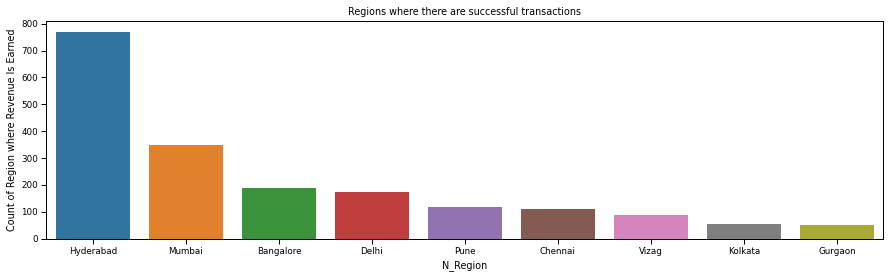

In [0]:
srf=pd.DataFrame(sr[False]) # srf represent data where revenue is false(people visited website but didn't redeemed coupon)
srt=pd.DataFrame(sr[True]) # srt represent data where revenue is true(people visited website and redeemed coupon)
plt.figure(figsize=(15,4))
sns.barplot(x=srt.index,y='N_Region',data=srt)
plt.ylabel('Count of Region where Revenue Is Earned')
plt.title('Regions where there are successful transactions')

People in Hyderabad often do online shoping. People living in Hyderabad are more prone to do deal. Its good to show the ads in Hyderabad if want to get more public attention.

Out[114]: [<matplotlib.lines.Line2D at 0x7f62fa810130>]

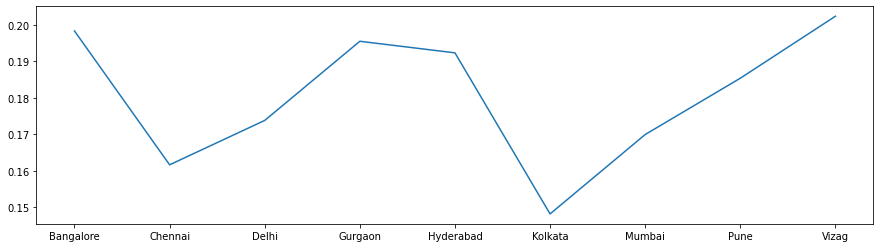

In [0]:
srp=srt/srf # finding the percentage of revenue true to false for each region
plt.figure(figsize=(15,4))
plt.plot(srp['N_Region'])

Altough in Vizag visitors are less comparitive to top Regions but it has highest buying percentage.

Kolkata is worst place for this business as the buying percentage is too low and even got less visitor.

Out[123]: Text(0, 0.5, 'Mean Time Spent')

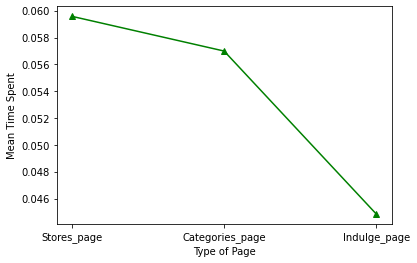

In [0]:
adm=np.mean((p_osi['Stores_page']/p_osi['Stores_page_Duration']).replace(np.inf,np.nan).dropna())
inm=np.mean((p_osi['Categories_page']/p_osi['Categories_page_Duration']).replace(np.inf,np.nan).dropna())
prm=np.mean((p_osi['Indulge_page']/p_osi['Indulge_page_Duration']).replace(np.inf,np.nan).dropna())
pagm=pd.Series([adm,inm,prm],index=['Stores_page','Categories_page','Indulge_page'])
plt.plot(pagm.index,pagm.values,'-^g')
plt.xlabel('Type of Page')
plt.ylabel('Mean Time Spent')

Average time spend on Indulge Page is least and max for Stores Related Page.

This means customers are pre-deciding with store coupons they want and visiting them. Customers are less interested in deal posts.

Out[126]: <AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

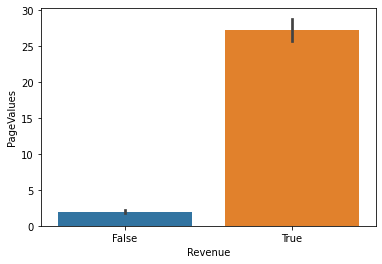

In [0]:
sns.barplot(y='PageValues',x='Revenue', data=p_osi)

If the page values are more i.e if number of pages visited by user is more, then thers more chance of earning revenue.

Out[129]: <AxesSubplot:xlabel='VisitorType', ylabel='BounceRates'>

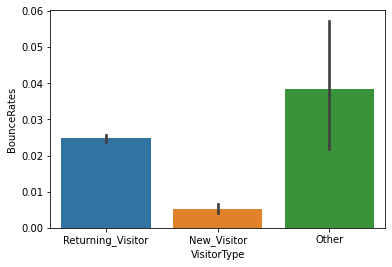

In [0]:
sns.barplot(y='BounceRates',x='VisitorType',data=p_osi)

Other visitors i.e visitors who are not registered have highest bounce rate compared to returning and new visitors.

Newly registered visitors often redeems the coupon.

In [0]:
train.count()

Out[172]: 78369

In [0]:
vis3.select([count(when(col(c).isNull(),c)).alias(c) for c in vis3.columns]).show(truncate=False,vertical=True)

-RECORD 0----------------
 cus_id            | 0   
 age_range         | 0   
 marital_status    | 0   
 rented            | 0   
 family_size       | 0   
 no_of_children    | 0   
 income_bracket    | 0   
 id                | 0   
 campaign_id       | 0   
 coupon_id         | 0   
 redemption_status | 0   
 campaign_type     | 0   
 start_date        | 0   
 end_date          | 0   
 duratioin         | 0   
 item_id           | 0   
 brand             | 0   
 brand_type        | 0   
 category          | 0   
 N_Category        | 0   



In [0]:
f_item.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- brand: integer (nullable = true)
 |-- brand_type: integer (nullable = true)
 |-- category: integer (nullable = true)



In [0]:
coupitem.count()

Out[189]: 92663

In [0]:
f_item.count()

Out[190]: 74066

In [0]:
f_custrans2.count()

Out[231]: 1324566

In [0]:
vis2.count()

Out[317]: 3807856

In [0]:
f_camp2=f_camp.withColumnRenamed("campaign_id","cid")
f_custrans2=f_custrans.withColumnRenamed("customer_id","id_cus").withColumnRenamed("item_id","id_item")
f_item2=f_item.withColumnRenamed("item_id","id_item")
f_cusdemo=f_cusdemo.withColumnRenamed("customer_id","cus_id")

In [0]:
cifi=coupitem.join(f_item2,coupitem.item_id==f_item2.id_item,"left").drop("id_item")
trcamp=train.join(f_camp2,train.campaign_id==f_camp2.cid,"left").drop("cid")
cifi=cifi.withColumnRenamed("coupon_id","coupid")
vis1=trcamp.join(cifi,trcamp.coupon_id==cifi.coupid).drop("coupid")
vis2=f_cusdemo.join(vis1,(f_cusdemo.cus_id==vis1.customer_id),"left").drop("customer_id")
vis2=vis2.na.drop("any")

In [0]:
vis2.printSchema()

root
 |-- age_range: integer (nullable = true)
 |-- marital_status: integer (nullable = true)
 |-- rented: integer (nullable = true)
 |-- family_size: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- income_bracket: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- campaign_id: integer (nullable = true)
 |-- coupon_id: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- redemption_status: string (nullable = true)
 |-- campaign_type: string (nullable = true)
 |-- start_date: date (nullable = true)
 |-- end_date: date (nullable = true)
 |-- duratioin: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- brand: integer (nullable = true)
 |-- brand_type: integer (nullable = true)
 |-- category: integer (nullable = true)
 |-- N_Category: string (nullable = true)



In [0]:
vis1=vis1.withColumn("campaign_type",vis1.campaign_type.cast(StringType()))
vis1=vis1.withColumn("campaign_type",when(vis1.campaign_type=='1',regexp_replace(vis1.campaign_type,'1','Social Media Ads campaign')).when(vis1.campaign_type=='0',regexp_replace(vis1.campaign_type,'0','paper&Billboard Ads campaign')))
vis1=vis1.withColumn("redemption_status",vis1.redemption_status.cast(StringType()))
vis1=vis1.withColumn("redemption_status",when(vis1.redemption_status=='1',regexp_replace(vis1.redemption_status,'1','Coupon used')).when(vis1.redemption_status=='0',regexp_replace(vis1.redemption_status,'0','coupon not used')))

In [0]:
vis2.groupby("age_range").count().show(truncate=False)

+---------+-------+
|age_range|count  |
+---------+-------+
|1        |901238 |
|3        |359185 |
|5        |182812 |
|4        |352585 |
|2        |729428 |
|0        |1282608|
+---------+-------+



In [0]:
tempitem.printSchema()
tempitem=item.withColumnRenamed("item_id","id_item").withColumnRenamed("category","N_Category").withColumnRenamed("brand","b").withColumnRenamed("brand_type","bt")
vis1=vis1.join(tempitem,vis1.item_id==tempitem.id_item,"left").drop('id_item','b','bt')
vis1=vis1.with
vis1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- campaign_id: integer (nullable = true)
 |-- coupon_id: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- redemption_status: integer (nullable = true)
 |-- campaign_type: string (nullable = true)
 |-- start_date: date (nullable = true)
 |-- end_date: date (nullable = true)
 |-- duratioin: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- brand: integer (nullable = true)
 |-- brand_type: integer (nullable = true)
 |-- category: integer (nullable = true)
 |-- N_Category: string (nullable = true)



In [0]:
p_vis1=vis1.groupby('redemption_status','campaign_type').count().toPandas()
p_vis2=vis1.groupby('redemption_status','N_Category').count().toPandas()

In [0]:
p_vis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   redemption_status  4 non-null      object
 1   campaign_type      4 non-null      object
 2   count              4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


Out[298]: <AxesSubplot:xlabel='campaign_type', ylabel='count'>

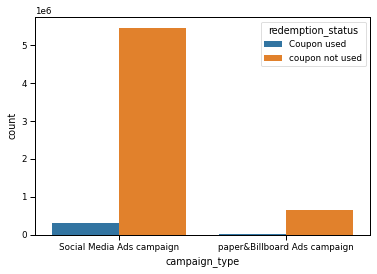

In [0]:
sns.barplot(x="campaign_type", y="count", 
             hue="redemption_status", 
             data=p_vis1) 

Out[304]: <AxesSubplot:xlabel='N_Category', ylabel='count'>

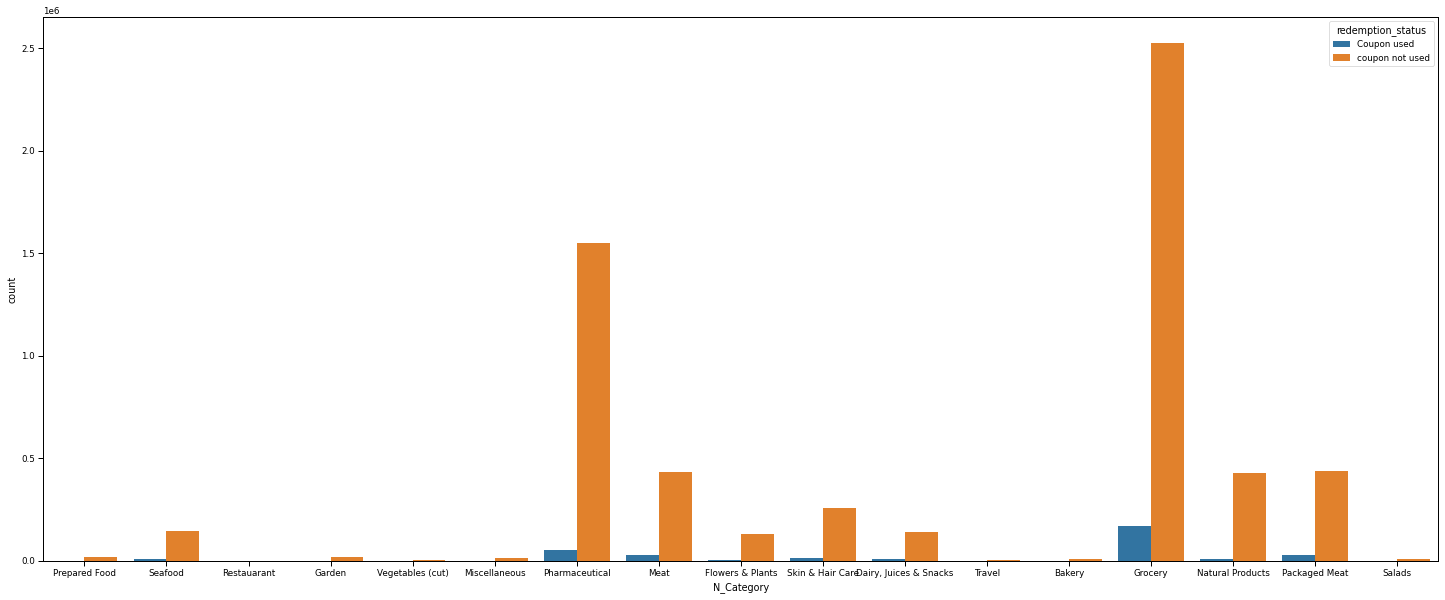

In [0]:
plt.figure(figsize=(25,10))
sns.barplot(x="N_Category", y="count", 
             hue="redemption_status", 
             data=p_vis2) 

Out[306]: <AxesSubplot:xlabel='N_Category', ylabel='count'>

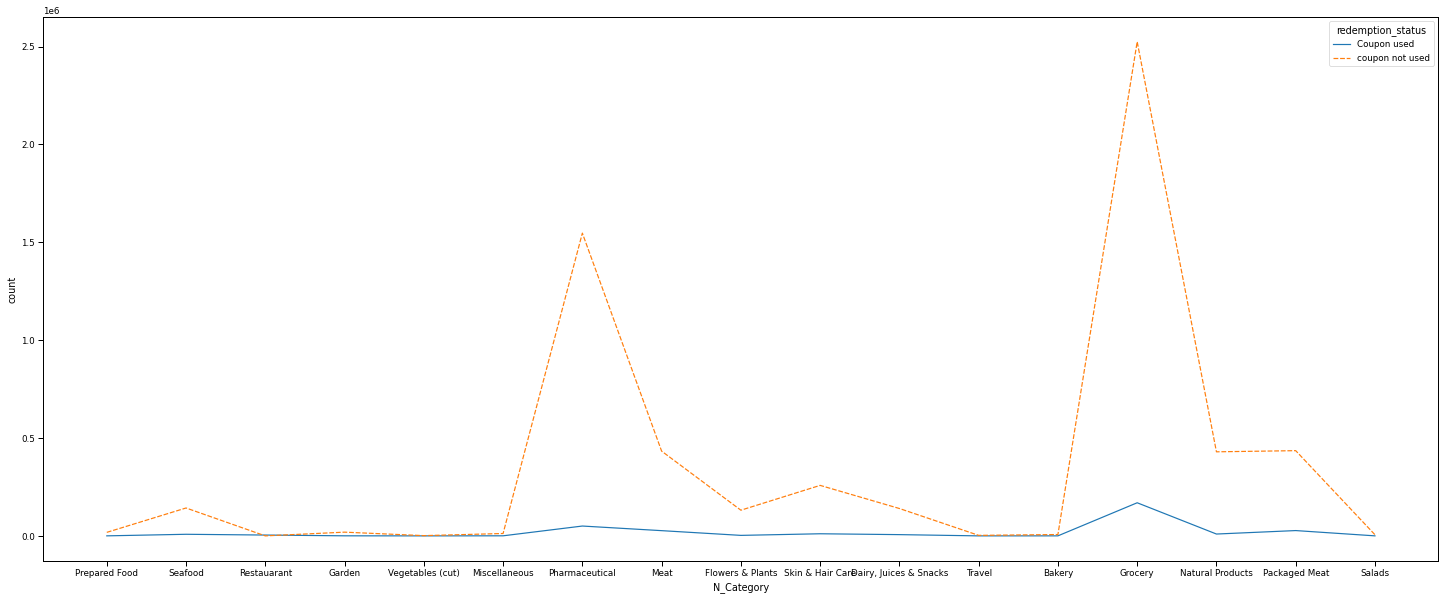

In [0]:
plt.figure(figsize=(25,10))
sns.lineplot(x="N_Category", y="count", 
             hue="redemption_status",style="redemption_status", 
             data=p_vis2) 

In [0]:
vis2.printSchema()

root
 |-- cus_id: integer (nullable = true)
 |-- age_range: integer (nullable = true)
 |-- marital_status: integer (nullable = true)
 |-- rented: integer (nullable = true)
 |-- family_size: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- income_bracket: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- campaign_id: integer (nullable = true)
 |-- coupon_id: integer (nullable = true)
 |-- redemption_status: string (nullable = true)
 |-- campaign_type: string (nullable = true)
 |-- start_date: date (nullable = true)
 |-- end_date: date (nullable = true)
 |-- duratioin: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- brand: integer (nullable = true)
 |-- brand_type: integer (nullable = true)
 |-- category: integer (nullable = true)
 |-- N_Category: string (nullable = true)
 |-- N_age_range: string (nullable = true)



In [0]:
p_vis3=vis2.groupby('income_bracket','redemption_status').count().toPandas()
p_vis4=vis2.groupby('N_age_range','redemption_status').count().toPandas()
p_vis5=vis2.groupby('N_Category','campaign_type').count().toPandas()

Out[332]: <AxesSubplot:xlabel='income_bracket', ylabel='count'>

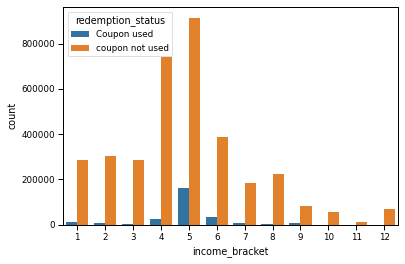

In [0]:
sns.barplot(x="income_bracket", y="count", 
             hue="redemption_status", 
             data=p_vis3) 

In [0]:

tempcusdemo=cusdemo.withColumnRenamed("age_range","N_age_range").withColumnRenamed("marital_status","ms").withColumnRenamed("rented","r").withColumnRenamed("family_size","fs").withColumnRenamed("no_of_children","nc").withColumnRenamed("income_bracket","ib")
vis2=vis2.join(tempcusdemo,vis2.cus_id==tempcusdemo.customer_id,"left").drop('customer_id','ms','r','fs','nc','ib')
vis2.printSchema()

root
 |-- cus_id: integer (nullable = true)
 |-- age_range: integer (nullable = true)
 |-- marital_status: integer (nullable = true)
 |-- rented: integer (nullable = true)
 |-- family_size: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- income_bracket: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- campaign_id: integer (nullable = true)
 |-- coupon_id: integer (nullable = true)
 |-- redemption_status: string (nullable = true)
 |-- campaign_type: string (nullable = true)
 |-- start_date: date (nullable = true)
 |-- end_date: date (nullable = true)
 |-- duratioin: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- brand: integer (nullable = true)
 |-- brand_type: integer (nullable = true)
 |-- category: integer (nullable = true)
 |-- N_Category: string (nullable = true)
 |-- N_age_range: string (nullable = true)
 |-- N_age_range: string (nullable = true)



Out[334]: <AxesSubplot:xlabel='N_age_range', ylabel='count'>

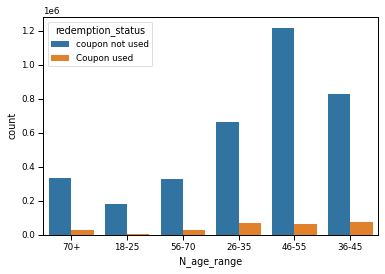

In [0]:
sns.barplot(x="N_age_range", y="count", 
             hue="redemption_status", 
             data=p_vis4) 

Out[337]: <AxesSubplot:xlabel='N_Category', ylabel='count'>

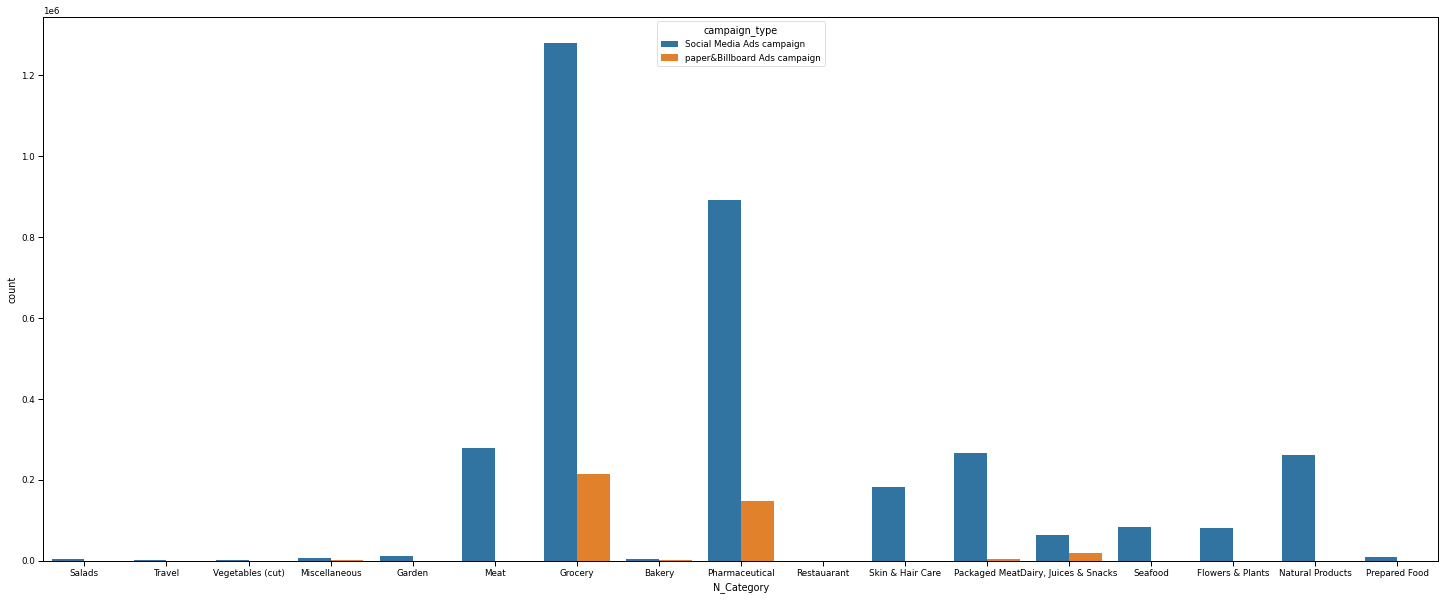

In [0]:
plt.figure(figsize=(25,10))
sns.barplot(x="N_Category", y="count", 
             hue="campaign_type", 
             data=p_vis5) 

Out[338]: <AxesSubplot:xlabel='N_Category', ylabel='count'>

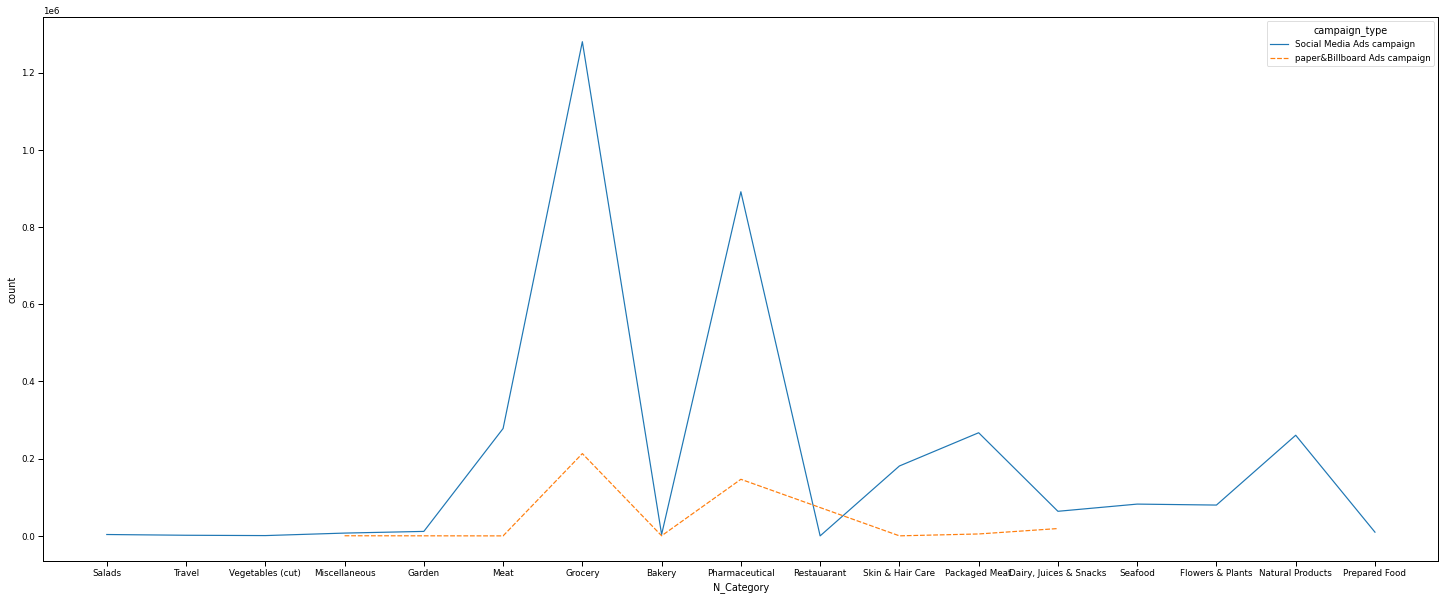

In [0]:
plt.figure(figsize=(25,10))
sns.lineplot(x="N_Category", y="count", 
             hue="campaign_type", style="campaign_type",
             data=p_vis5) 